In [ ]:
import pandas as pd 
import numpy as np
import sys
from sklearn import datasets
iris = datasets.load_iris()
Iris_data = pd.DataFrame(iris.data, columns=['sepal length','sepal width','petal length','petal width'])
Iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
y = df.loc[:,['target']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = Iris_data.loc[:, features].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x, columns = features)
X.head()


,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa


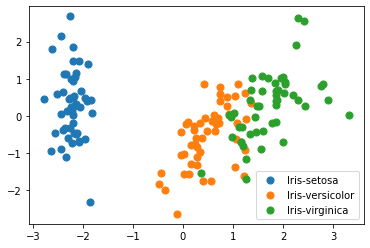

In [ ]:
import matplotlib.pyplot as plt 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for target in targets:
  indicesToKeep = finalDf['target'] == target
  plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], s = 50)
plt.legend(targets)
plt.show()

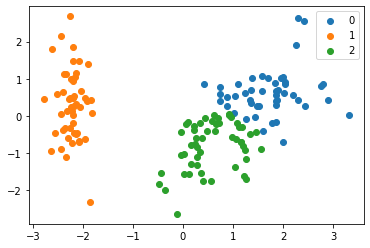

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf)
points = kmeans.labels_
centroids = kmeans.cluster_centers_
k=3
for i in range(k):
    plt.scatter(principalDf.loc[points == i]['principal component 1'], principalDf.loc[points == i]['principal component 2'], label = i)
plt.legend()
plt.show()